# 課題

YIQの各成分の効果をみるために、画像をYIQ形式に変換し、Y、I、Qのうち1つの要素のみを残してほかの要素は一定値（すべての画素の平均値など）にした後RGBにもどした画像を生成してみよ。

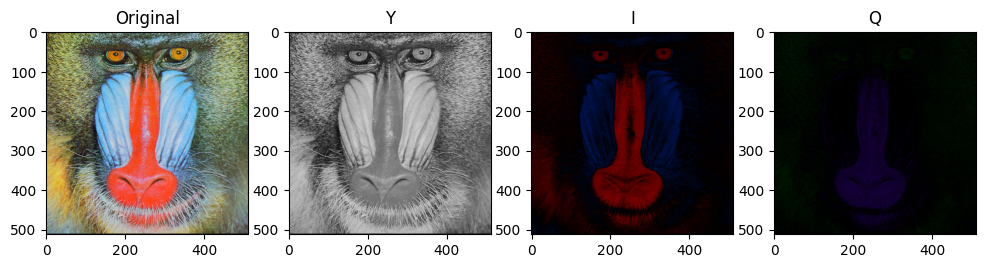

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def rgb2yiq(img: np.ndarray):
	"RGB画像をYIQ表色系に変換する関数"
	r = img[:, :, 0].copy()
	g = img[:, :, 1].copy()
	b = img[:, :, 2].copy()
	
	y = 0.299 * r + 0.587 * g + 0.114 * b
	i = 0.596 * r - 0.274 * g - 0.322 * b
	q = 0.211 * r - 0.523 * g + 0.312 * b
	
	return y, i, q


def yiq2rgb(y: np.ndarray, i: np.ndarray, q: np.ndarray):
	"YIQ表色系をRGB画像に変換する関数"
	H, W = y.shape
	r = 1 * y + 0.956 * i + 0.621 * q
	g = 1 * y - 0.273 * i - 0.647 * q
	b = 1 * y - 1.104 * i + 1.70 * q

	out = np.zeros([H, W, 3], dtype=np.float64)
	out[:, :, 0] = r
	out[:, :, 1] = g
	out[:, :, 2] = b
	out = out.clip(0, 255).astype(np.uint32)
	return out


img = io.imread("imgs/baboon.png")
plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(img)

y, i, q = rgb2yiq(img)

# 残す要素以外はゼロにする
y_zero = np.zeros_like(y)
i_zero = np.zeros_like(i)
q_zero = np.zeros_like(q)

rgb_y_img = yiq2rgb(y, i_zero, q_zero)
plt.subplot(1, 4, 2)
plt.title('Y')
plt.imshow(rgb_y_img)

rgb_i_img = yiq2rgb(y_zero, i, q_zero)
plt.subplot(1, 4, 3)
plt.title('I')
plt.imshow(rgb_i_img)

rgb_q_img = yiq2rgb(y_zero, i_zero, q)
plt.subplot(1, 4, 4)
plt.title('Q')
plt.imshow(rgb_q_img)